# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

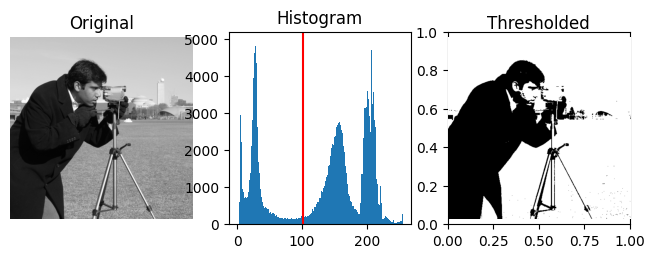

In [2]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




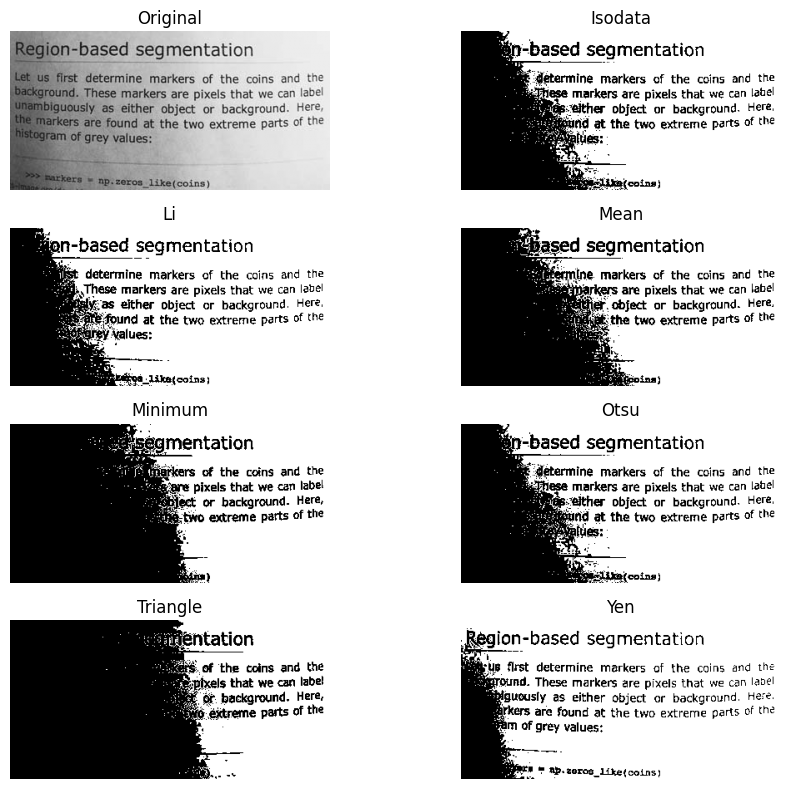

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [4]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

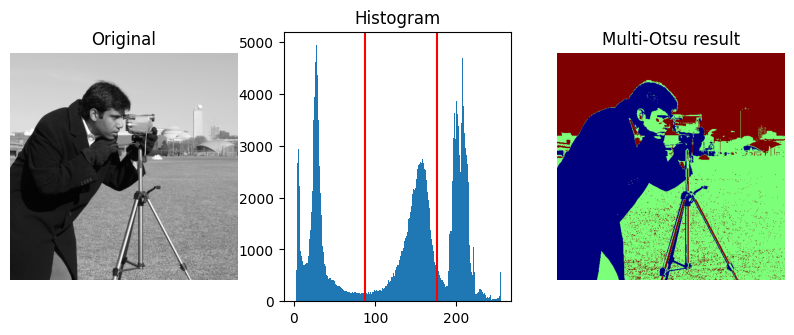

In [5]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

### Algoritmo de Otsu
El algoritmo de Otsu es un método de umbralización que se utiliza para convertir una imagen en escala de grises en una imagen binaria. El objetivo del algoritmo es encontrar un umbral que minimice la varianza intra-clase y maximice la varianza inter-clase, separando así los píxeles de la imagen en dos grupos (fondo y objeto).

### Pasos del algoritmo de Otsu
1.- Calcular el histograma de la imagen en escala de grises.

2.- Calcular la probabilidad de cada nivel de gris.

3.- Inicializar las variables: varianza intra-clase, varianza inter-clase y umbral óptimo.

4.-Para cada posible umbral:

- Dividir los píxeles en dos clases (C1 y C2) usando el umbral.

- Calcular la probabilidad acumulada y la media de cada clase.

- Calcular la varianza intra-clase.

- Calcular la varianza inter-clase.

- Evaluar la función objetivo y actualizar el umbral óptimo si es necesario.

5.- Seleccionar el umbral que minimice la varianza intra-clase y maximice la varianza inter-clase.

## Fórmula matemática utilizada
La varianza intra-clase se calcula como: $$ \sigma^2_w(t) = \omega_1(t) \sigma^2_1(t) + \omega_2(t) \sigma^2_2(t) $$

Donde: 𝜔1(𝑡) y 𝜔2(𝑡) son las probabilidades acumuladas de las clases C1 y C2, respectivamente. 𝜎12
(
𝑡
)
 y
𝜎
2
2
(
𝑡
)
 son las varianzas de las clases C1 y C2, respectivamente.

La varianza inter-clase se calcula como: $$ \sigma^2_b(t) = \omega_1(t) \omega_2(t) [\mu_1(t) - \mu_2(t)]^2 $$

Donde:

𝜇
1
(
𝑡
)
 y
𝜇
2
(
𝑡
)
 son las medias de las clases C1 y C2, respectivamente.

### Ventajas y desventajas del algoritmo de Otsu

Ventajas:

- **Simplicidad**: fácil de implementar y comprender.

- **Eficiencia**: adecuado para imágenes con una clara separación entre fondo y objeto.

- No requiere parámetros adicionales.

Desventajas:

- **Sensible al ruido**: el algoritmo puede no funcionar bien en imágenes ruidosas.

- Menor eficacia en imágenes con múltiples objetos o distribución de niveles de gris compleja.

- **No adaptativo**: puede no funcionar bien en imágenes con variaciones de iluminación.

### Condiciones de uso
El algoritmo de Otsu es más efectivo cuando la imagen tiene una clara separación entre el fondo y el objeto y cuando la iluminación es relativamente uniforme.

### Aplicaciones cotidianas
- **Segmentación de imágenes médicas**: para separar áreas de interés en imágenes de rayos X, resonancias magnéticas, etc.

- **Reconocimiento de caracteres**: para convertir imágenes de texto en texto binario.

- **Procesamiento de imágenes de documentos**: para mejorar la legibilidad y extracción de texto.

- **Control de calidad en la manufactura**: para detectar defectos en productos.

- **Análisis de imágenes satelitales**: para distinguir áreas de tierra y agua.


### Referencias:
- Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.

- Otsu, N. (1979). A threshold selection method from gray-level histograms. IEEE Transactions on Systems, Man, and Cybernetics, 9(1), 62-66. doi:10.1109/TSMC.1979.4310076

- Sezgin, M., & Sankur, B. (2004). Survey over image thresholding techniques and quantitative performance evaluation. Journal of Electronic Imaging, 13(1), 146-168. doi:10.1117/1.1631315


# Implementación del algoritmo de Otsu

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

Para este ejercicio utilizaremos imagenes que utilizamos en prácticas anteriores con fondos de diferemte complejidad.

In [8]:
# Importamos diferentes imagenes que hemos utilizado anteriormente.
img_path1 = "/content/drive/MyDrive/VisionComp_Imagenes/data/san_basilio.jpg"
img_path2 = "/content/drive/MyDrive/VisionComp_Imagenes/data/tortu_1.jpeg"
img_path3 = "/content/drive/MyDrive/VisionComp_Imagenes/data/vias_tren.jpg"
img_path4 = "/content/drive/MyDrive/VisionComp_Imagenes/data/chichen_itza.jpg"
img_path5 = "/content/drive/MyDrive/VisionComp_Imagenes/data/enbalse.jpg"
img_path6 = "/content/drive/MyDrive/VisionComp_Imagenes/data/nasa_sun1.jpg"

# Carga de imagenes
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
img3 = cv2.imread(img_path3)
img4 = cv2.imread(img_path4)
img5 = cv2.imread(img_path5)
img6 = cv2.imread(img_path6)

# Transformamos la imagen a una escala de grises.
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img5_gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
img6_gray = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

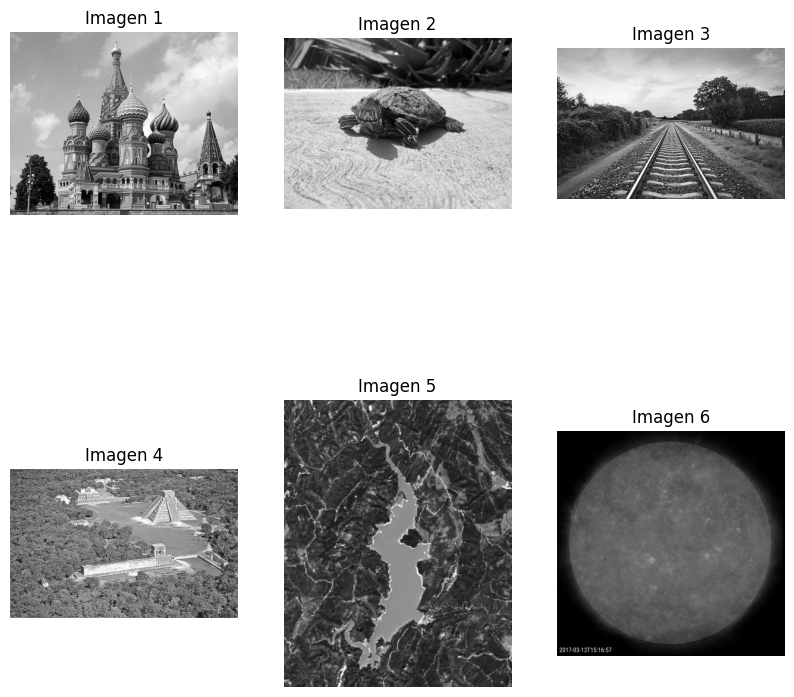

In [9]:
# Lista con las imagenes importadas
images = [img1_gray, img2_gray, img3_gray, img4_gray, img5_gray, img6_gray]

# Visualizamos las imagenes.
plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Imagen {i+1}')
    plt.axis('off')
plt.show()

# Ejercicio 1: Imagenes con background simple.
Para esta primera parte separamos aquellas imagenes que tienen un background sencillo para analizarlso primero.

Imagenes seleccionadas:
- Imagen 1.
- Imagen 4.
- Imagen 6.

In [10]:
# Generamos una fucnión que ejecuta el algoritmo para un single threshold
def otsu_single_threshold(image):
  thresh = threshold_otsu(image)
  binary1 = image > thresh

  fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2].imshow(binary1, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.show()


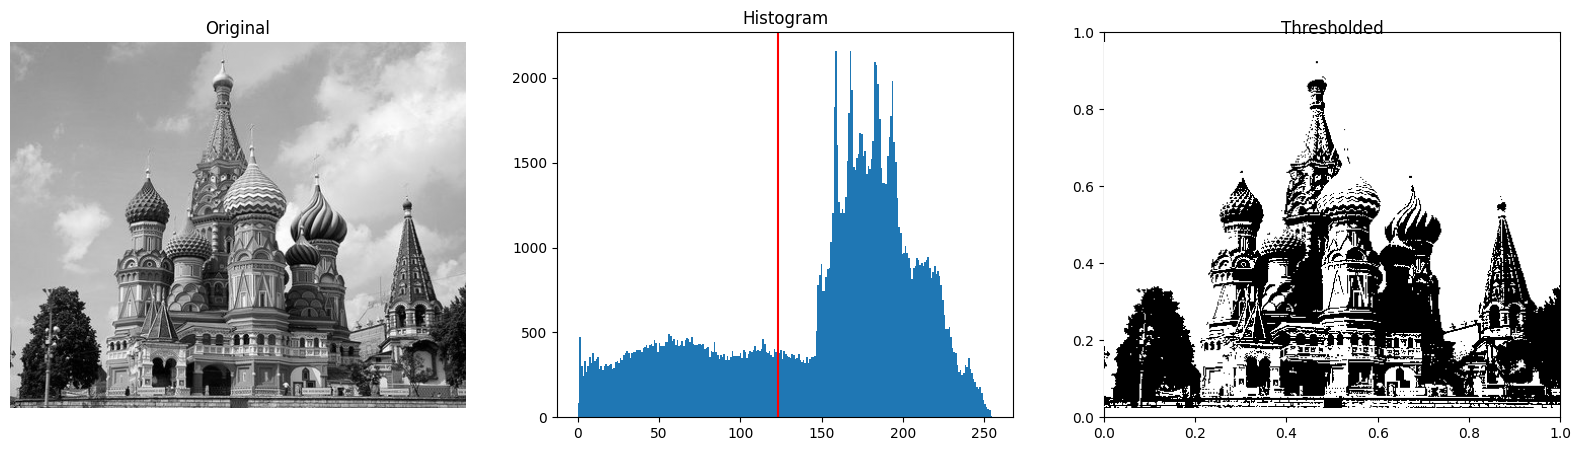

In [11]:
otsu_single_threshold(img1_gray)

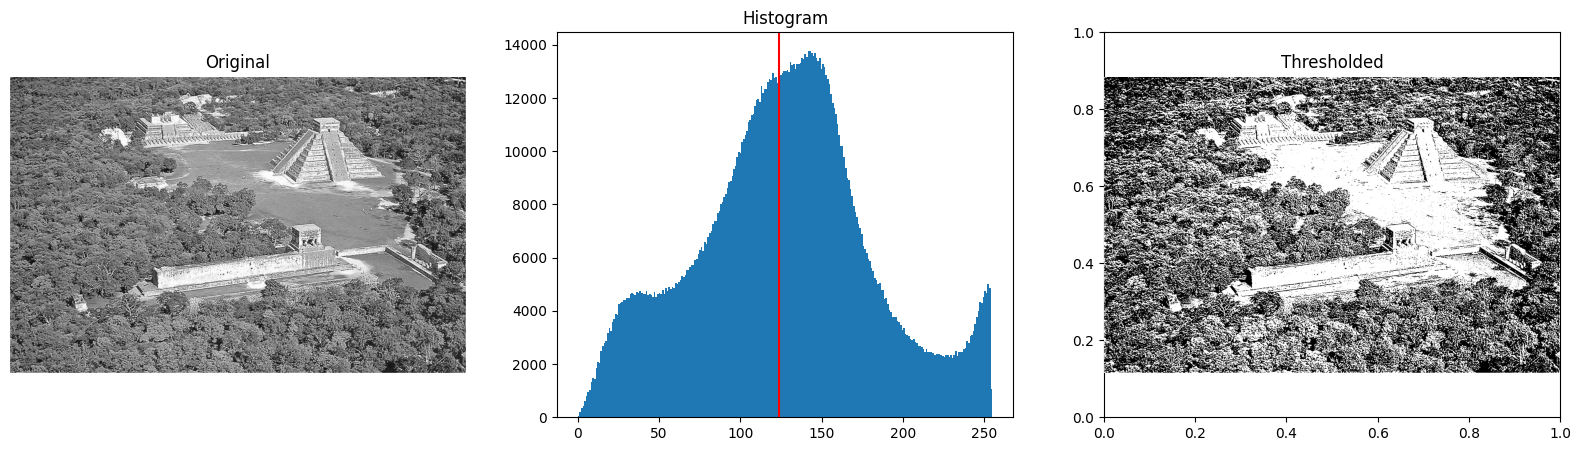

In [12]:
otsu_single_threshold(img4_gray)

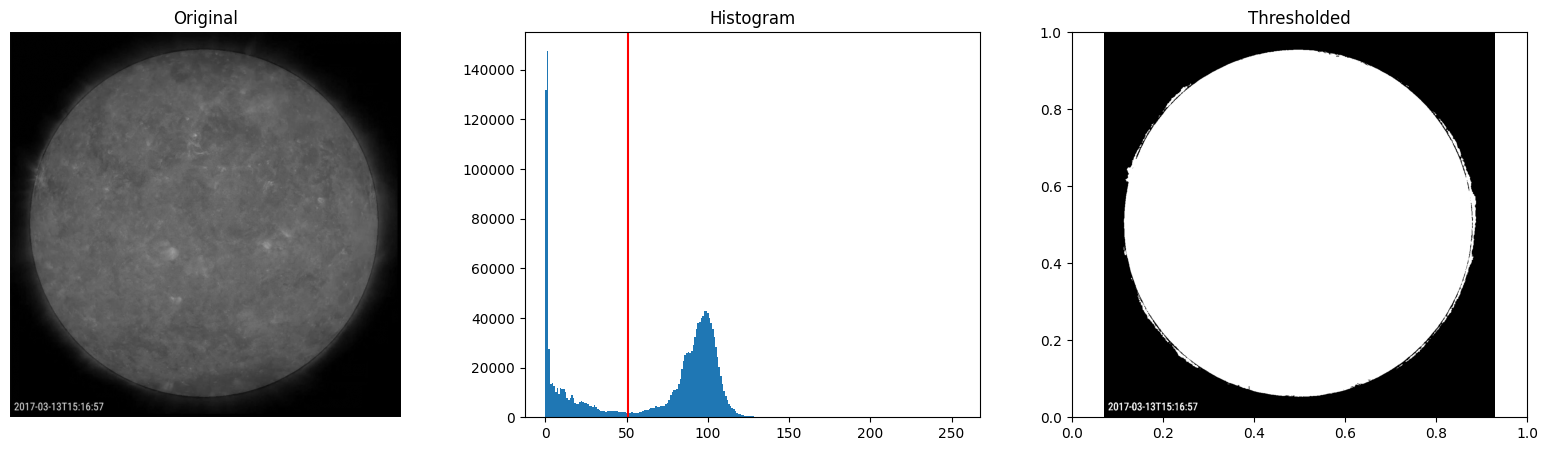

In [13]:
otsu_single_threshold(img6_gray)

`Primeras concluciones`: Podemos observar de estas primeras ejecuciones que los histogramas suelen tener una distribución con un solo pico por lo general las imagenes sufren diferentes tipos de transformación de acuerdo a suu background:
- imagen 1: El contorno de las formas de las nuves desaparece. Solo se queda todo el fondo en blanco.
- imagen 4: Parece no tener tanto efecto, la parte de la plaza principal es la que pierde su detalle, y justo se esperaba o buscaba lo contrario.
- imagen 6: La imagen cambia completamente volviendose binaria entre el negro y la esfera blanca.

In [14]:
# Definimos una función para el caso multiple.
def otsu_multi_threshold(image):
  #Aplicando multi-Otsu y generando 3 clases
  thresholds = threshold_multiotsu(image)

  # Usando los valores del Threshold y generamos las regiones
  regions = np.digitize(image, bins=thresholds)

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

  # Impresión de los objetos
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')

  # PImpresion del histograma generado
  ax[1].hist(image.ravel(), bins=255)
  ax[1].set_title('Histogram')
  for thresh in thresholds:
      ax[1].axvline(thresh, color='r')

  # Impresión del resultado
  ax[2].imshow(regions, cmap='jet')
  ax[2].set_title('Multi-Otsu result')
  ax[2].axis('off')

  plt.subplots_adjust()

  plt.show()

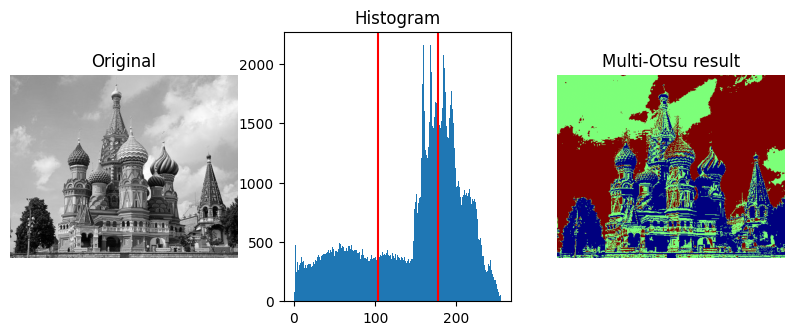

In [15]:
otsu_multi_threshold(img1_gray)

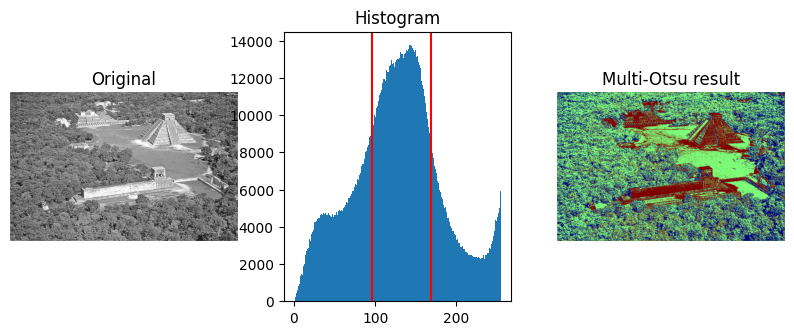

In [16]:
otsu_multi_threshold(img4_gray)

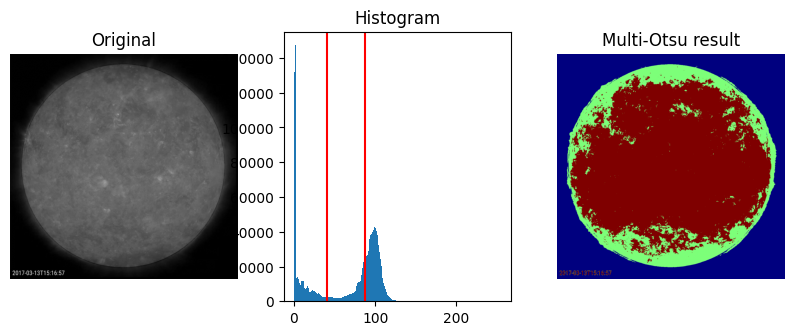

In [17]:
otsu_multi_threshold(img6_gray)

`Primeras concluciones`: Al usar el algoritmo de forma multiple observamos varios cambios sustanciales a comparación de su versión simple. El pricipal es el resalte de los detalles.

- imagen 1: Se preservan los detalles del cielo y ahora se separa en 2 grandes zonas.
- imagen 4: Los edificios quedan resaltados en color rojo. Y el background homogeneo. Es un buen resultado que se esperaba como en ejercicios anteriores.
- imagen 6: El mejor resultado de la imagen pues ahora se logrna ver zonas donde el sol tiene relieve.

# Ejercicio 2: Imagenes con Background Complejo.
Para esta primera parte separamos aquellas imagenes que tienen un background complejo para analizarlo.

Imagenes seleccionadas:
- Imagen 2.
- Imagen 3.
- Imagen 5.

## Simple Thresholding

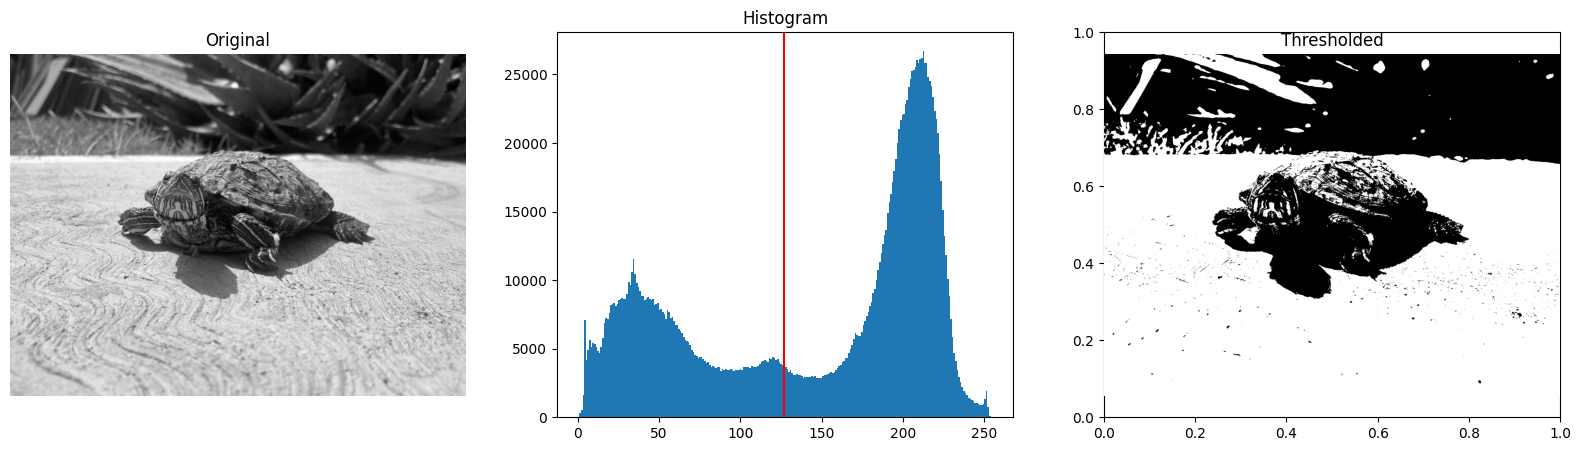

In [18]:
otsu_single_threshold(img2_gray)

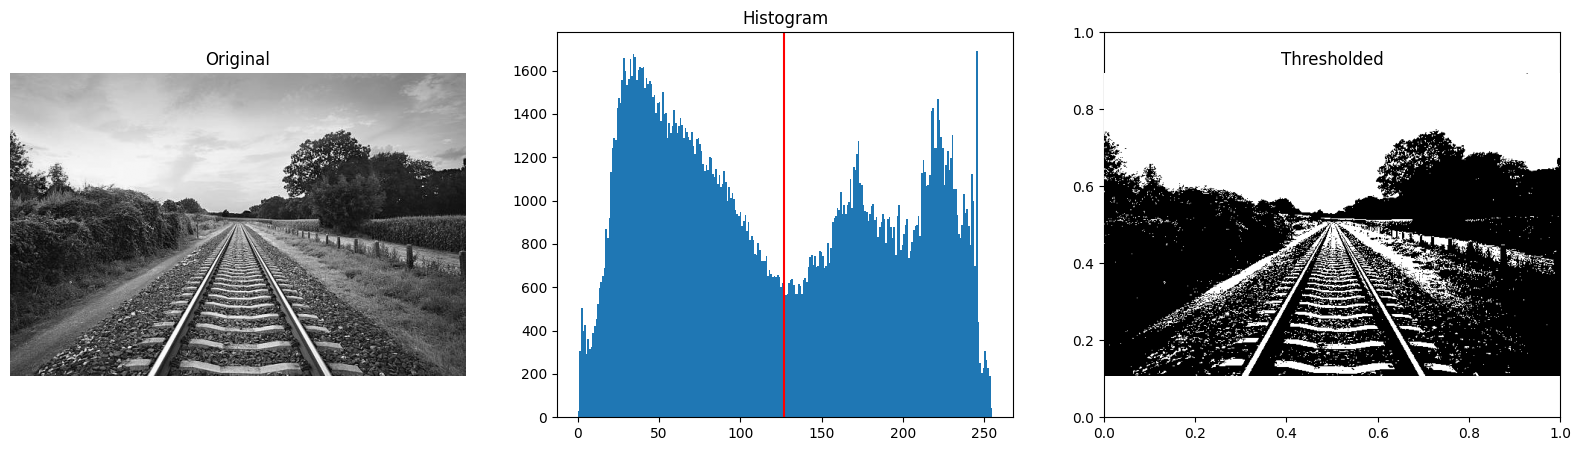

In [19]:
otsu_single_threshold(img3_gray)

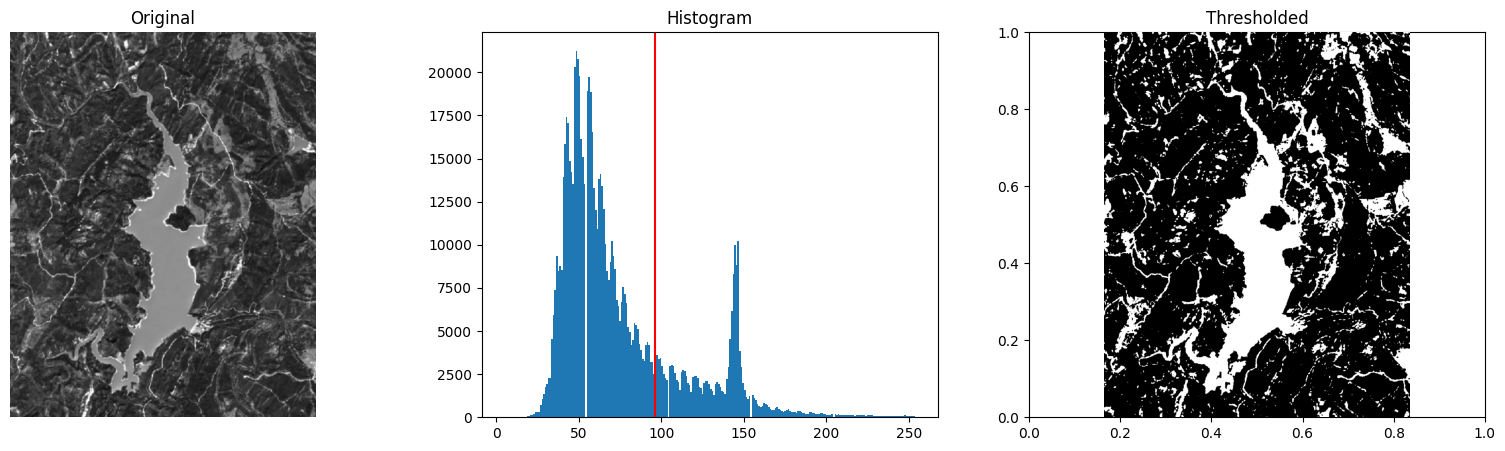

In [20]:
otsu_single_threshold(img5_gray)

`Primeras concluciones`: Analizamos el caso de las imagenes con fondo complejo estas imagenes como podemos observar tienen histogramas irregulares con variios picos y de forma desproporcionada.

- imagen 2: Elementos del piso o del fondo desaparecen al pasar a ser de colores blanco y negro respectivamente.
- imagen 3: Forma y contorno del cielo desaparece completamente, muchos detalles de los arboles pasan a ser inperceptibles.
- imagen 5: Muchos relieves que no son perceptibles en la imagen original lo son después de la transformación, son perceptibles los caminios y cavidades.

## Multi Thresholding

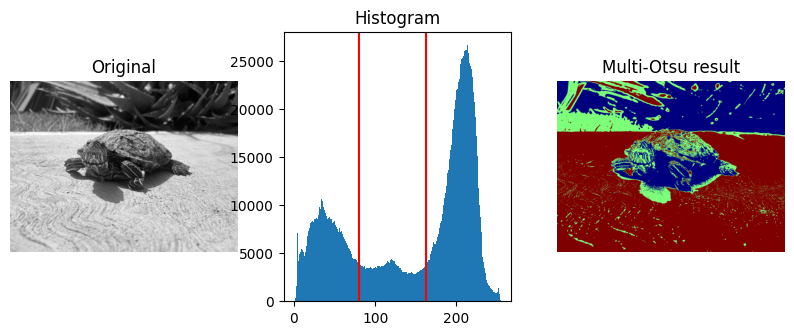

In [21]:
otsu_multi_threshold(img2_gray)

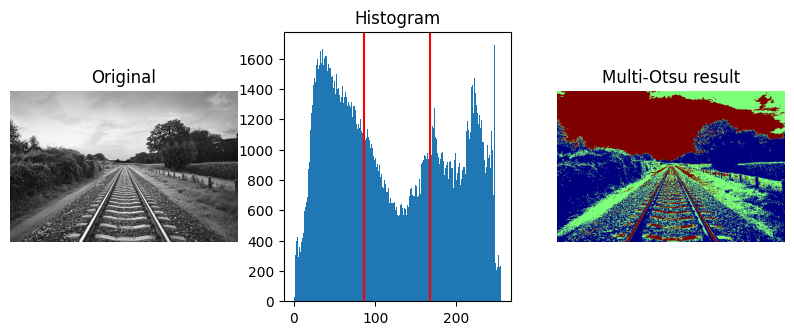

In [22]:
otsu_multi_threshold(img3_gray)

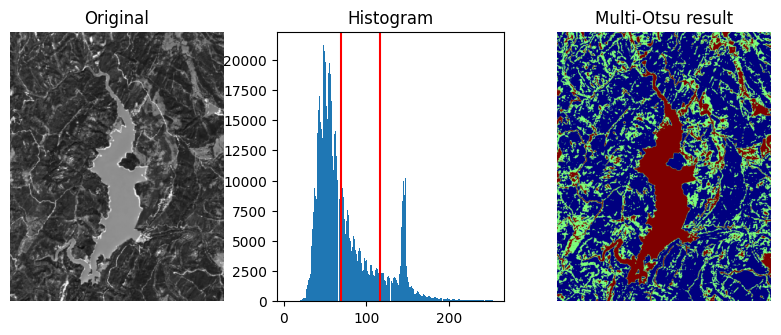

In [23]:
otsu_multi_threshold(img5_gray)

`Primeras concluciones`: Con el filtro multiple los resultados son diferentes a aquellas imagenes con fondo simple.

- imagen 2: Se separa en 2 grandes partes, el piso de negro y el resto del fondo en color azul, el objeto principal a analizar que es la tortuga pierde forma y contorno.
- imagen 3: Ahora los relieves del cielo no desaparecen, las caracteristicas de los arboles son mucho merjo perceptibles. Es una mejora a comparación de la forma simple.
- imagen 5: Aparecen nuevos valores y detalles Aunque no tan bien perceptibles, a comparación de la forma simple los resultados ahora son más complejos e imperceptibles.

# Ejercicio 3 - Pruebas de algoritmo Otsu para ventanas de diferentes tamaños.

Generamos una función que aplica el método `threshold_otsu` que es un algoritmo de ventanas para el método simple de Otsu.

In [24]:
from skimage.filters import threshold_otsu

def otsu_multi_window_threshold(image, grid_size=(2, 2)):
    """
    Aplica el umbral de Otsu a múltiples sub-ventanas de una imagen.
    :param imagen: Imagen de entrada en escala de grises
    :param tamaño_grid: Tupla que define el tamaño de la cuadrícula (filas, columnas)
    :return: Imagen umbralizada
    """
    h, w = image.shape
    rows, cols = grid_size
    sub_h, sub_w = h // rows, w // cols
    # generamos matriz de ceros para almacenar valores.
    output = np.zeros_like(image, dtype=bool)
    # generacion de sub-ventanas
    for i in range(rows):
        for j in range(cols):
            y1, y2 = i * sub_h, (i + 1) * sub_h
            x1, x2 = j * sub_w, (j + 1) * sub_w
            # subtamaño de ventanas de la imagen
            sub_image = image[y1:y2, x1:x2]
            thresh = threshold_otsu(sub_image)
            # Salida una vez aplicado el método a la subbentana
            output[y1:y2, x1:x2] = sub_image > thresh
    # Impresión de la imagen
    fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')
    # Impresión del histograma
    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    # Impresión de la salida
    ax[2].imshow(output, cmap=plt.cm.gray)
    ax[2].set_title('Multi-Window Thresholded')
    ax[2].axis('off')

    plt.show()



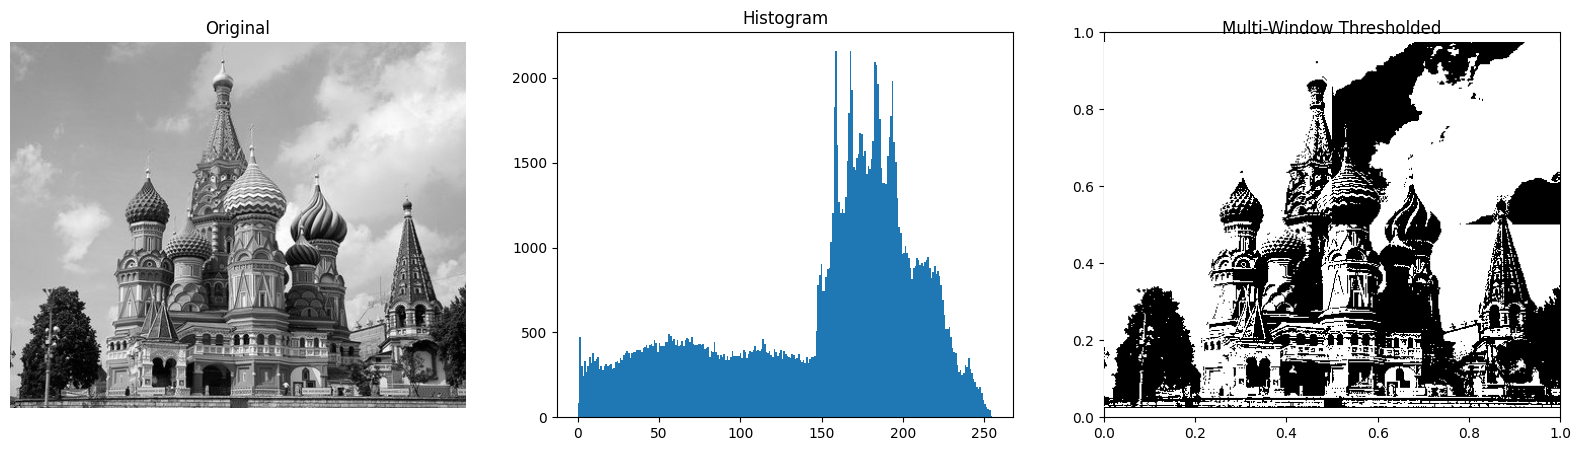

In [25]:
otsu_multi_window_threshold(img1_gray)

Generamos una función que aplica el método `threshold_multiotsu` que es un algoritmo de ventanas para el método Multiple de Otsu.

In [26]:
from skimage.filters import threshold_multiotsu

def otsu_multi_window_otsu_threshold(image, grid_size=(2, 2)):
    """
    Aplica el umbral de Multi-Otsu a múltiples sub-ventanas de una imagen.
    :param imagen: Imagen de entrada en escala de grises
    :param tamaño_grid: Tupla que define el tamaño de la cuadrícula (filas, columnas)
    :return: Imagen umbralizada
    """
    h, w = image.shape
    rows, cols = grid_size
    sub_h, sub_w = h // rows, w // cols

    output = np.zeros_like(image, dtype=bool)

    for i in range(rows):
        for j in range(cols):
            y1, y2 = i * sub_h, (i + 1) * sub_h
            x1, x2 = j * sub_w, (j + 1) * sub_w
            # Generación de sub-ventanas
            sub_image = image[y1:y2, x1:x2]
            thresholds = threshold_multiotsu(sub_image, classes=3)

            # Usando las primeras y segundas ventanas generadas
            output[y1:y2, x1:x2] = (sub_image > thresholds[0]) & (sub_image < thresholds[1])

    fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
    ax = axes.ravel()
    # Subdivición del plot.
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])
    # Impresion de la imagen original
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')
    # Impresion de histogramas
    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    # Impresión de la salida
    ax[2].imshow(output, cmap=plt.cm.gray)
    ax[2].set_title('Multi-Window Multi-Otsu Thresholded')
    ax[2].axis('off')

    plt.show()


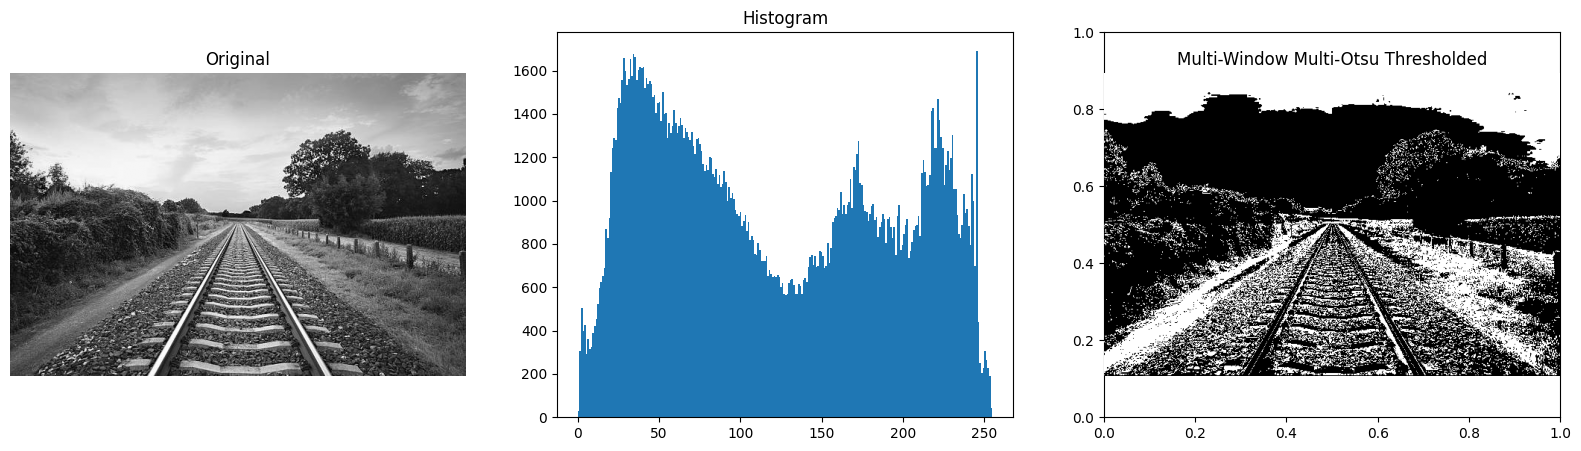

In [27]:
otsu_multi_window_otsu_threshold(img3_gray)

`Primeras concluciones`: Observamos que los resultados son mejores que usando el método simple pues al ahora ser por médio de ventanas hay elementos que antes no eran perciptibles que aparecen en los resultados finales, el claro ejemplo es el cielo que ahora aparece y tienen contornos además de algunos elementos que tienen una mucho mejor resolución como es el caso de la imagne 3 que el contorno de lso arboles se ve mucho mejor. El resultado del algoritmo por ventanas nos ha devuelto mejores resultados.

## Ejercicio 4 - Implementación de diferentes algoritmos adicionales (Extra).
Importamos de la libreria `skimage.filters` el método `try_all_threshold` que nos permite aplicar no solo Otsu, sino que también varias implementaciones de métodos similares y compararlos para una simple imagen y ver los cambios entre métodos.

In [28]:
from skimage.filters import try_all_threshold
#from skimage.filters import threshold_local

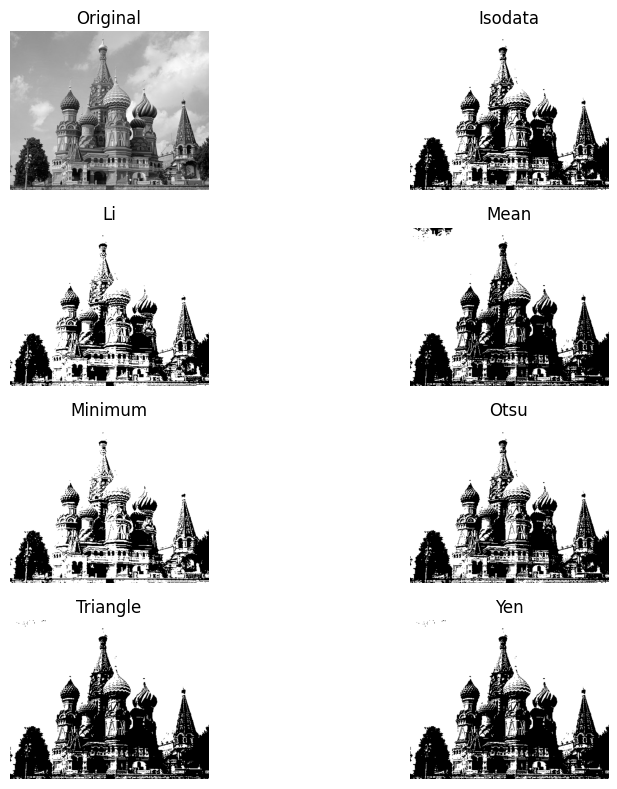

In [29]:
# Imagen a analizar.
img = img1_gray
# Implementación.
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

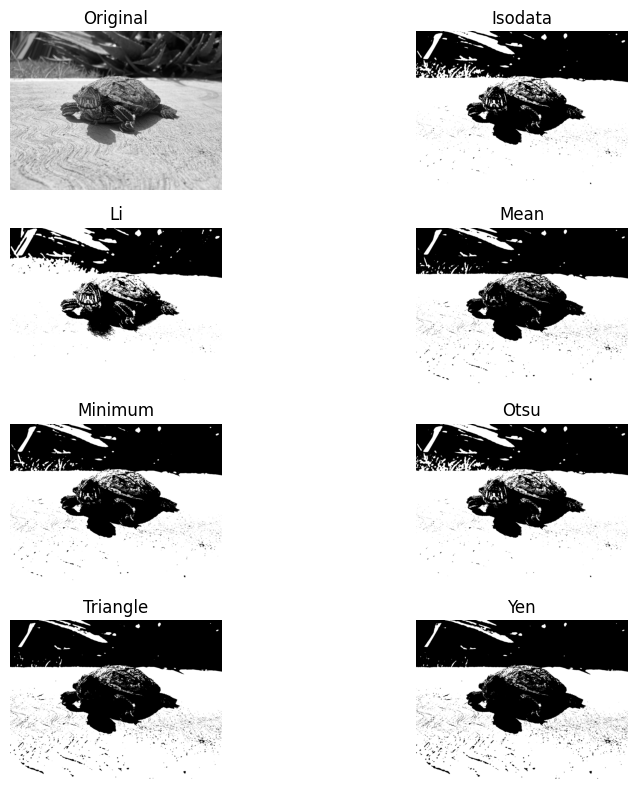

In [30]:
img = img2_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

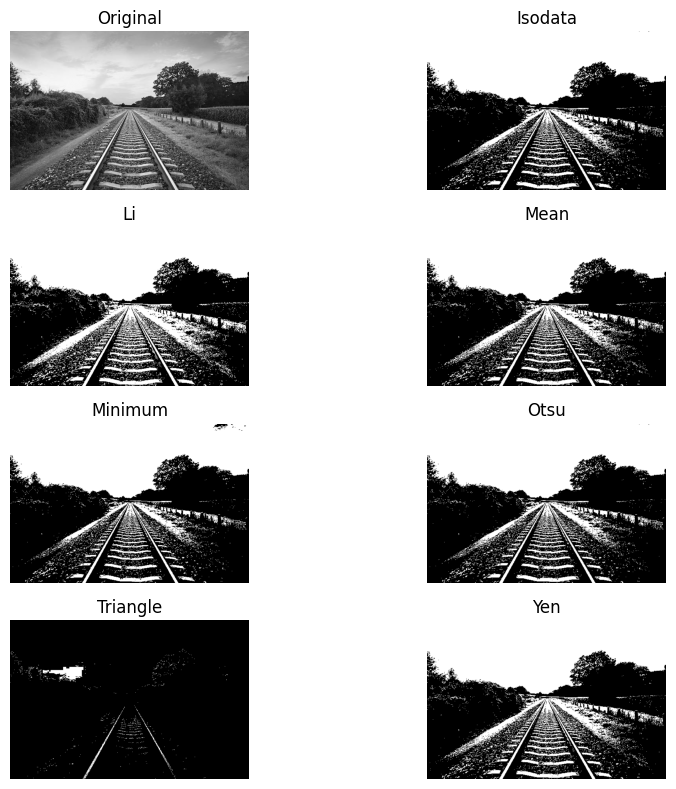

In [31]:
img = img3_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

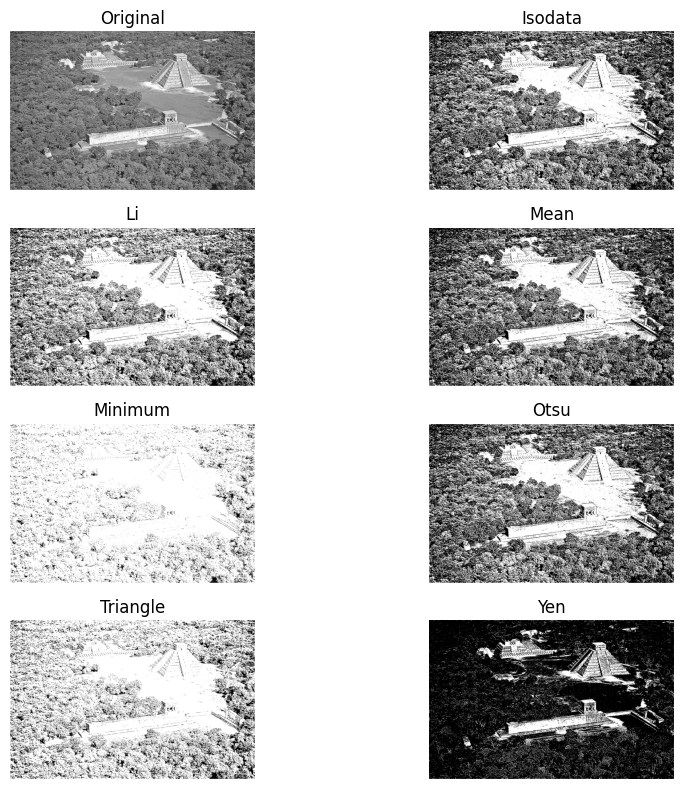

In [32]:
img = img4_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

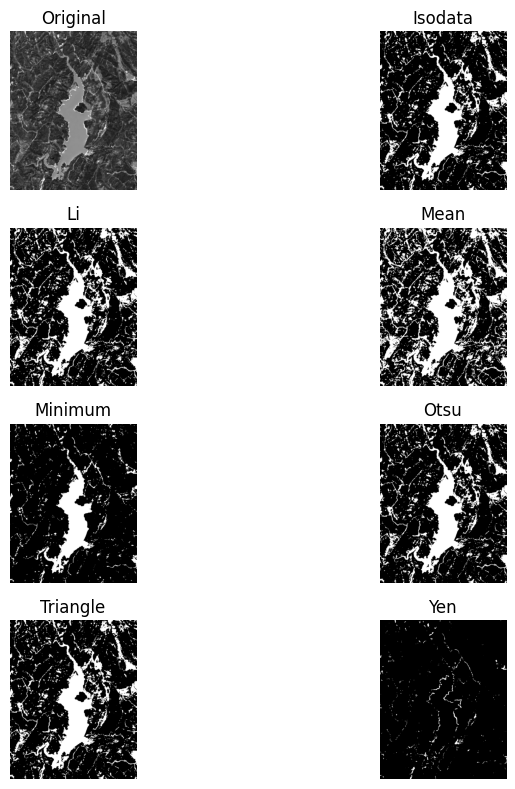

In [33]:
img = img5_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

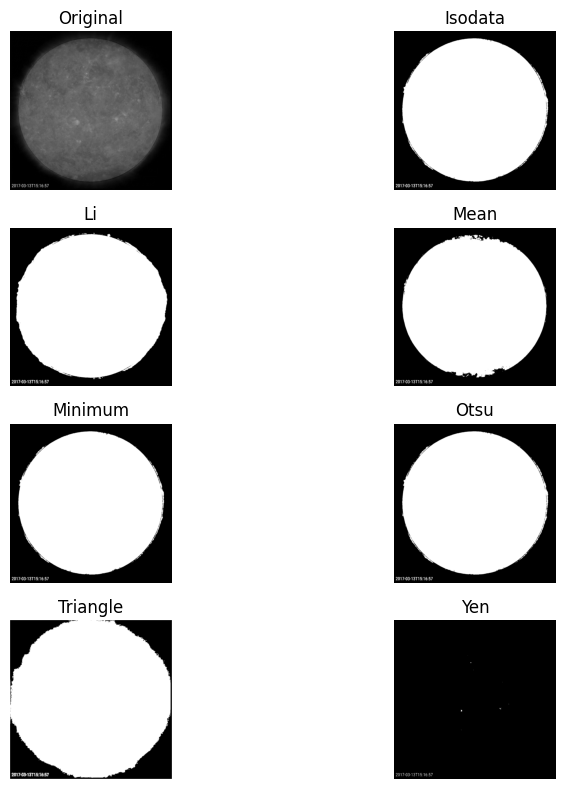

In [34]:
img = img6_gray

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# Conclusiones:

Observamos diferentes implementaciones en diferentes imagenes con distintos tipos de fondo, unas con fondos simples y otras con fondos muy complejos. Encontramos en la ejecución del método que para algunas imagenes la implementación simple no es la mejor adecuada y es mejor la implementación multiple, de forma analoga para algunas imagenes es mejor la implementación multiple que la simple, un claro ejemplo es al analizar el cielo con el método simple se perdia todo contorno del cielo y con el multiple no, para resaltar detalles del objeto principal de la imagenes era mucho mejor en algunos casos el método simple que el multiple.

A continuación dejamos un resumen de las imagenes y el método que dio mejor reusltado:
- Imagen 1: Simple
- Imagen 2: Multiple
- Imagen 3: Ambos dieron buenos resultados.
- Imagen 4: Complejo
- Imagen 5: Simple.
- Imagen 6: Multiple.


# Referencias:
- Gonzalez, R., & Woods, R. (Year). Digital image processing (4th ed.). Pearson.
- [GeeksforGeeks. (n.d.). Mahotas - Otsu's method. GeeksforGeeks](https://www.geeksforgeeks.org/mahotas-otsus-method/)
- [Bose, S. (n.d.). Otsu thresholding with OpenCV. LearnOpenCV](https://learnopencv.com/otsu-thresholding-with-opencv/)
- [OpenCV. (n.d.). Thresholding in OpenCV.](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)